Questions:

???????????????????????????????????

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_som.som import SOM
import numpy as np
from sklearn import preprocessing
from pandas.api.types import is_numeric_dtype

plt.rcParams['figure.figsize'] = (10, 6)

,ImageNumber,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,...,phenocluster,index.x,index.y,Slide,Patient,Status.simple,cx,cy,nx,ny
0,20200731_MBAA047_S11_R-4_D-S11_T59_R1,1,232,122,"5,94769102585868","0,0128861485992438","0,351471207519938","0,496079401763715","2,24891296330452","2,96938086908198",...,19,59,59,11,5,Dysplastic,587.344828,527.500000,588.008197,528.024590
1,20200731_MBAA047_S11_R-4_D-S11_T59_R1,2,66,42,"5,95240191254949","0,022503800575832","0,28432046338496","0,553486863341693","2,24426482497145","2,99401084194055",...,19,59,59,11,5,Dysplastic,478.590909,529.742424,477.833333,530.309524
2,20200731_MBAA047_S11_R-4_D-S11_T59_R1,3,174,58,"5,95082993060535","0,00861519475862809","0,243111849066537","0,401599552619976","2,2490319725307","2,97628522417339",...,19,59,59,11,5,Dysplastic,101.166667,528.936782,101.775862,529.189655
3,20200731_MBAA047_S11_R-4_D-S11_T59_R1,4,186,72,"5,94954944619245","0,0453151121207948","0,353890511871444","0,593056099449522","2,22853143953012","2,96928636764223",...,6,59,59,11,5,Dysplastic,214.059140,531.478495,212.833333,529.444444
4,20200731_MBAA047_S11_R-4_D-S11_T59_R1,5,78,48,"5,9472964744642",0,"0,16683716198276","0,588930304085899","2,21490712237399","2,94503771875414",...,19,59,59,11,5,Dysplastic,279.346154,529.115385,280.375000,529.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394127,20210808_MBAA047_S8_R-8_D-S8_T40_R1,4537,424,196,"7,22596432270196","0,101881717038508","1,21349301181762","0,65990535451547","2,51432698462407","3,73029774104269",...,4,40,40,8,4,Dysplastic,87.981132,14.617925,88.877551,15.040816
394128,20210808_MBAA047_S8_R-8_D-S8_T40_R1,4538,152,28,"7,22695347160368","0,299457823364012","2,31867256044022","0,634151671480612","2,56644472596313","3,73201759613691",...,9,40,40,8,4,Dysplastic,128.921053,15.131579,129.785714,15.000000
394129,20210808_MBAA047_S8_R-8_D-S8_T40_R1,4539,44,44,"7,22781197332515",0,"0,129362284437408","0,496241546819615","2,39276911939606","3,75347328531286",...,4,40,40,8,4,Dysplastic,25.681818,13.409091,25.681818,13.409091
394130,20210808_MBAA047_S8_R-8_D-S8_T40_R1,4540,86,34,"7,23380970979037","0,0212675134209089","0,614445729745138","0,533270994718248","2,58739516832215","3,75165972237976",...,4,40,40,8,4,Dysplastic,91.965116,8.825581,90.617647,9.911765


In [ ]:
df = pd.read_csv('data/full_data_clean.csv')
df = df.drop(columns=['Status.simple'], axis=1)


In [50]:
dfn = df.copy()
dic = {}
for c in dfn.columns[1:]:
    if is_numeric_dtype(dfn[c]):
        dic[c] = preprocessing.MinMaxScaler()
        dfn[c] = dic[c].fit_transform(dfn[c].values.reshape(-1,1)).reshape(-1)
dfn

,ImageNumber,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,...,TCRgd_Mean,pAKT_Mean,H3_Mean,H3_Nucl_Mean,Ir193_Mean,Ir193_Nucl_Mean,cx,cy,nx,ny
11766,20210728_MBAA47_S10_R-1_D-S10_T44_R2,0.000000,0.288312,0.195312,0.134022,0.006014,0.007561,0.090078,0.274994,0.120414,...,0.140128,0.127807,0.414127,0.440406,0.069873,0.168297,0.360493,0.343167,0.361549,0.342161
11767,20210728_MBAA47_S10_R-1_D-S10_T44_R2,0.000257,0.122078,0.101562,0.133998,0.118884,0.280272,0.096391,0.268309,0.121132,...,0.169976,0.083367,0.473233,0.454709,0.123715,0.118396,0.453044,0.341911,0.453951,0.341437
11768,20210728_MBAA47_S10_R-1_D-S10_T44_R2,0.000386,0.028571,0.062500,0.133606,0.000000,0.005445,0.071500,0.273132,0.128268,...,0.150874,0.069631,0.407407,0.384488,0.103130,0.115244,0.346201,0.338777,0.345837,0.339503
11769,20210728_MBAA47_S10_R-1_D-S10_T44_R2,0.000644,0.200000,0.250000,0.134159,0.004129,0.019585,0.108654,0.271266,0.112488,...,0.158579,0.100179,0.417550,0.428492,0.094004,0.174589,0.105150,0.339632,0.105308,0.339578
11770,20210728_MBAA47_S10_R-1_D-S10_T44_R2,0.000772,0.233766,0.250000,0.133657,0.003620,0.031477,0.114292,0.271833,0.118769,...,0.121891,0.073734,0.436468,0.429177,0.056374,0.103129,0.372028,0.338671,0.371807,0.338295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329601,20210807_MBAA047_S4_R-5_D-S4_T24_R3,0.188160,0.085714,0.070312,0.096292,0.000000,0.030499,0.073852,0.086133,0.109278,...,0.117257,0.040867,0.393454,0.404843,0.038155,0.075118,0.116881,0.009738,0.116164,0.010161
329602,20210807_MBAA047_S4_R-5_D-S4_T24_R3,0.188288,0.132468,0.453125,0.096827,0.023818,0.117157,0.047089,0.102334,0.105948,...,0.170457,0.019104,0.317215,0.287430,0.016299,0.014616,0.126254,0.010358,0.126254,0.010975
329603,20210807_MBAA047_S4_R-5_D-S4_T24_R3,0.188417,0.283117,0.265625,0.096299,0.038150,0.142435,0.065242,0.088919,0.109481,...,0.255067,0.071688,0.389104,0.360122,0.047631,0.034104,0.139751,0.004884,0.136954,0.008683
329604,20210807_MBAA047_S4_R-5_D-S4_T24_R3,0.188546,0.127273,0.109375,0.096307,0.005820,0.050271,0.092841,0.094290,0.106432,...,0.130187,0.040292,0.421548,0.421833,0.038756,0.059461,0.112711,0.006644,0.113485,0.008230


In [51]:
# grouped = dfn.drop(["cx", "cy"], axis = 1).groupby('ImageNumber')
grouped = dfn.groupby('ImageNumber')
# grouped.count()

In [52]:
som = SOM(m=4, n=4, dim=56)
maxs = 0
keep = None
t = 150
for name, group in grouped:
    features = group._get_numeric_data().values
    if len(features) > maxs:
        maxs = len(features)
        if keep is not None:
            epoch = len(keep)*t
            som.fit(keep, epochs=epoch)
        keep = features
    else:
        epoch = len(features)*t
        som.fit(features, epochs=epoch)

In [53]:
df1n = keep.copy()
df1n = pd.DataFrame(df1n, columns=col[2:])
df2 = dfd[dfd['ImageNumber'] == '20210808_MBAA047_S8_R-2_D-S8_T42_R4']
# normalize df1
df2n = df2.copy()
for c in df2n.columns:
    if is_numeric_dtype(df2n[c]):
        df2n[c] = (df2n[c]-df2n[c].mean())/df2n[c].std()

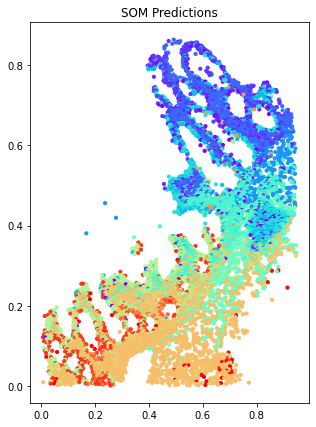

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = df1n['cx']
y = df1n['cy']

ax.scatter(x, y, c=som.predict(df1n._get_numeric_data().values), cmap='rainbow', s=10)
ax.title.set_text('SOM Predictions')


plt.show()

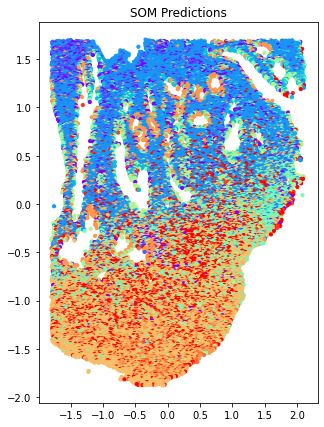

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = df2n['cx']
y = df2n['cy']
features = df2n._get_numeric_data().values
ax.scatter(x, y, c=som.predict(features), cmap='rainbow', s=10)
ax.title.set_text('SOM Predictions')


plt.show()

In [56]:
d = som.cluster_centers_[0,0].copy()
for i in range(len(d)):
    if is_numeric_dtype(col[i]):
        d[i] = dic[col[i]].inverse_transform(d[i])

In [57]:
d

array([0.05007527, 0.3616507 , 0.50499827, 0.09224208, 0.0185266 ,
       0.09330982, 0.09859984, 0.09343687, 0.10165128, 0.10757774,
       0.0596076 , 0.27924345, 0.06308882, 0.1575859 , 0.11456107,
       0.12753578, 0.12260065, 0.0756386 , 0.21653052, 0.23748638,
       0.01416465, 0.05480307, 0.05959572, 0.21610056, 0.05440333,
       0.06921936, 0.06491521, 0.07089698, 0.16001002, 0.07037015,
       0.16937855, 0.22509435, 0.12205348, 0.04170339, 0.12000854,
       0.02033021, 0.17075679, 0.19059521, 0.05937258, 0.13483976,
       0.15263589, 0.07483756, 0.08375014, 0.10516771, 0.12546075,
       0.33859676, 0.24972971, 0.13883047, 0.49010859, 0.47109489,
       0.12998254, 0.1711041 , 0.11706668, 0.35599269, 0.11714051,
       0.35638719])